<h1><u><center>University Schema Assignment</center></u></h1>

### **DATABASE CREATION AND CONNECTING IT**


In [105]:
!pip install SQLAlchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import pandas as pd
import sqlite3
connection=sqlite3.connect('university.db')

In [107]:
%load_ext sql
%sql sqlite:///university.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### NOW WE WILL CREATE TABLES AND INSERT DATA


In [108]:
%%sql
create table classroom
	(building		varchar(15),
	 room_number		varchar(7),
	 capacity		numeric(4,0),
	 primary key (building, room_number)
	);


 * sqlite:///university.db
(sqlite3.OperationalError) table classroom already exists
[SQL: create table classroom
	(building		varchar(15),
	 room_number		varchar(7),
	 capacity		numeric(4,0),
	 primary key (building, room_number)
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [109]:
%%sql
insert into classroom values ('Packard', '101', '500');
insert into classroom values ('Painter', '514', '10');
insert into classroom values ('Taylor', '3128', '70');
insert into classroom values ('Watson', '100', '30');
insert into classroom values ('Watson', '120', '50');
insert into classroom values ('Taylor', '112', '30');
insert into classroom values ('Painter', '234', '50');
insert into classroom values ('Packard', '303', '56')

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: classroom.building, classroom.room_number
[SQL: insert into classroom values ('Packard', '101', '500');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [110]:
%%sql
select * from classroom

 * sqlite:///university.db
Done.


building,room_number,capacity
Packard,101,500
Painter,514,10
Taylor,3128,70
Watson,100,30
Watson,120,50
Taylor,112,30
Painter,234,50
Packard,303,56


In [111]:
%%sql
create table department
	(dept_name		varchar(20), 
	 building		varchar(15), 
	 budget		        numeric(12,2) check (budget > 0),
	 primary key (dept_name)
	);

 * sqlite:///university.db
(sqlite3.OperationalError) table department already exists
[SQL: create table department
	(dept_name		varchar(20), 
	 building		varchar(15), 
	 budget		        numeric(12,2) check (budget > 0),
	 primary key (dept_name)
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [112]:
%%sql
insert into department values ('Biology', 'Watson', '90000');
insert into department values ('Comp. Sci.', 'Taylor', '100000');
insert into department values ('Elec. Eng.', 'Taylor', '85000');
insert into department values ('Finance', 'Painter', '120000');
insert into department values ('History', 'Painter', '50000');
insert into department values ('Music', 'Packard', '80000');
insert into department values ('Physics', 'Watson', '70000');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: department.dept_name
[SQL: insert into department values ('Biology', 'Watson', '90000');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [113]:
%%sql
select * from department

 * sqlite:///university.db
Done.


dept_name,building,budget
Biology,Watson,91000
Comp. Sci.,Taylor,101000
Elec. Eng.,Taylor,86000
Finance,Painter,121000
History,Painter,51000
Music,Packard,81000
Physics,Watson,71000


In [114]:
%%sql
create table course
	(course_id		varchar(8), 
	 title			varchar(50), 
	 dept_name		varchar(20),
	 credits		numeric(2,0) check (credits > 0),
	 primary key (course_id),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);

 * sqlite:///university.db
(sqlite3.OperationalError) table course already exists
[SQL: create table course
	(course_id		varchar(8), 
	 title			varchar(50), 
	 dept_name		varchar(20),
	 credits		numeric(2,0) check (credits > 0),
	 primary key (course_id),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [115]:
%%sql

insert into course values ('BIO-101', 'Intro. to Biology', 'Biology', '4');
insert into course values ('BIO-301', 'Genetics', 'Biology', '4');
insert into course values ('BIO-399', 'Computational Biology', 'Biology', '3');
insert into course values ('CS-101', 'Intro. to Computer Science', 'Comp. Sci.', '4');
insert into course values ('CS-190', 'Game Design', 'Comp. Sci.', '4');
insert into course values ('CS-315', 'Robotics', 'Comp. Sci.', '3');
insert into course values ('CS-319', 'Image Processing', 'Comp. Sci.', '3');
insert into course values ('CS-347', 'Database System Concepts', 'Comp. Sci.', '3');
insert into course values ('EE-181', 'Intro. to Digital Systems', 'Elec. Eng.', '3');
insert into course values ('FIN-201', 'Investment Banking', 'Finance', '3');
insert into course values ('HIS-351', 'World History', 'History', '3');
insert into course values ('MU-199', 'Music Video Production', 'Music', '3');
insert into course values ('PHY-101', 'Physical Principles', 'Physics', '4');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: course.course_id
[SQL: insert into course values ('BIO-101', 'Intro. to Biology', 'Biology', '4');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [116]:
%%sql
select * from course

 * sqlite:///university.db
Done.


course_id,title,dept_name,credits
BIO-101,Intro. to Biology,Biology,4
BIO-301,Genetics,Biology,4
BIO-399,Computational Biology,Biology,3
CS-101,Intro. to Computer Science,Comp. Sci.,4
CS-190,Game Design,Comp. Sci.,4
CS-315,Robotics,Comp. Sci.,3
CS-319,Image Processing,Comp. Sci.,3
CS-347,Database System Concepts,Comp. Sci.,3
EE-181,Intro. to Digital Systems,Elec. Eng.,3
FIN-201,Investment Banking,Finance,3


In [117]:
%%sql
create table instructor
	(ID			varchar(5), 
	 name			varchar(20) not null, 
	 dept_name		varchar(20), 
	 salary			numeric(8,2) check (salary > 29000),
	 primary key (ID),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);

 * sqlite:///university.db
(sqlite3.OperationalError) table instructor already exists
[SQL: create table instructor
	(ID			varchar(5), 
	 name			varchar(20) not null, 
	 dept_name		varchar(20), 
	 salary			numeric(8,2) check (salary > 29000),
	 primary key (ID),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [118]:
%%sql
insert into instructor values ('10101', 'Srinivasan', 'Comp. Sci.', '65000');
insert into instructor values ('12121', 'Wu', 'Finance', '90000');
insert into instructor values ('15151', 'Mozart', 'Music', '40000');
insert into instructor values ('22222', 'Einstein', 'Physics', '95000');
insert into instructor values ('32343', 'El Said', 'History', '60000');
insert into instructor values ('33456', 'Gold', 'Physics', '87000');
insert into instructor values ('45565', 'Katz', 'Comp. Sci.', '75000');
insert into instructor values ('58583', 'Califieri', 'History', '62000');
insert into instructor values ('76543', 'Singh', 'Finance', '80000');
insert into instructor values ('76766', 'Crick', 'Biology', '72000');
insert into instructor values ('83821', 'Brandt', 'Comp. Sci.', '92000');
insert into instructor values ('98345', 'Kim', 'Elec. Eng.', '80000');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: instructor.ID
[SQL: insert into instructor values ('10101', 'Srinivasan', 'Comp. Sci.', '65000');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [119]:
%%sql
select * from instructor

 * sqlite:///university.db
Done.


ID,name,dept_name,salary
10101,Srinivasan,Comp. Sci.,71500
12121,Wu,Finance,99000
15151,Mozart,Music,44000
22222,Einstein,Physics,95000
32343,El Said,History,66000
33456,Gold,Physics,95700
45565,Katz,Comp. Sci.,82500
58583,Califieri,History,68200
76543,Singh,Finance,88000
76766,Crick,Biology,79200


In [120]:
%%sql
create table section
	(course_id		varchar(8), 
         sec_id			varchar(8),
	 semester		varchar(6)
		check (semester in ('Fall', 'Winter', 'Spring', 'Summer')), 
	 year			numeric(4,0) check (year > 1701 and year < 2100), 
	 building		varchar(15),
	 room_number		varchar(7),
	 time_slot_id		varchar(4),
	 primary key (course_id, sec_id, semester, year),
	 foreign key (course_id) references course (course_id)
		on delete cascade,
	 foreign key (building, room_number) references classroom (building, room_number)
		on delete set null
	);



 * sqlite:///university.db
(sqlite3.OperationalError) table section already exists
[SQL: create table section
	(course_id		varchar(8), 
         sec_id			varchar(8),
	 semester		varchar(6)
		check (semester in ('Fall', 'Winter', 'Spring', 'Summer')), 
	 year			numeric(4,0) check (year > 1701 and year < 2100), 
	 building		varchar(15),
	 room_number		varchar(7),
	 time_slot_id		varchar(4),
	 primary key (course_id, sec_id, semester, year),
	 foreign key (course_id) references course (course_id)
		on delete cascade,
	 foreign key (building, room_number) references classroom (building, room_number)
		on delete set null
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [121]:
%%sql
insert into section values ('BIO-101', '1', 'Summer', '2017', 'Painter', '514', 'B');
insert into section values ('BIO-301', '1', 'Summer', '2018', 'Painter', '514', 'A');
insert into section values ('CS-101', '1', 'Fall', '2017', 'Packard', '101', 'H');
insert into section values ('CS-101', '1', 'Spring', '2018', 'Packard', '101', 'F');
insert into section values ('CS-190', '1', 'Spring', '2017', 'Taylor', '3128', 'E');
insert into section values ('CS-190', '2', 'Spring', '2017', 'Taylor', '3128', 'A');
insert into section values ('CS-315', '1', 'Spring', '2018', 'Watson', '120', 'D');
insert into section values ('CS-319', '1', 'Spring', '2018', 'Watson', '100', 'B');
insert into section values ('CS-319', '2', 'Spring', '2018', 'Taylor', '3128', 'C');
insert into section values ('CS-347', '1', 'Fall', '2017', 'Taylor', '3128', 'A');
insert into section values ('EE-181', '1', 'Spring', '2017', 'Taylor', '3128', 'C');
insert into section values ('FIN-201', '1', 'Spring', '2018', 'Packard', '101', 'B');
insert into section values ('HIS-351', '1', 'Spring', '2018', 'Painter', '514', 'C');
insert into section values ('MU-199', '1', 'Spring', '2018', 'Packard', '101', 'D');
insert into section values ('PHY-101', '1', 'Fall', '2017', 'Watson', '100', 'A');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: section.course_id, section.sec_id, section.semester, section.year
[SQL: insert into section values ('BIO-101', '1', 'Summer', '2017', 'Painter', '514', 'B');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [122]:
%%sql
select * from section

 * sqlite:///university.db
Done.


course_id,sec_id,semester,year,building,room_number,time_slot_id
BIO-101,1,Summer,2017,Painter,514,B
BIO-301,1,Summer,2018,Painter,514,A
CS-101,1,Fall,2017,Packard,101,H
CS-101,1,Spring,2018,Packard,101,F
CS-190,1,Spring,2017,Taylor,3128,E
CS-190,2,Spring,2017,Taylor,3128,A
CS-315,1,Spring,2018,Watson,120,D
CS-319,1,Spring,2018,Watson,100,B
CS-319,2,Spring,2018,Taylor,3128,C
CS-347,1,Fall,2017,Taylor,3128,A


In [123]:
%%sql
create table teaches
	(ID			varchar(5), 
	 course_id		varchar(8),
	 sec_id			varchar(8), 
	 semester		varchar(6),
	 year			numeric(4,0),
	 primary key (ID, course_id, sec_id, semester, year),
	 foreign key (course_id, sec_id, semester, year) references section (course_id, sec_id, semester, year)
		on delete cascade,
	 foreign key (ID) references instructor (ID)
		on delete cascade
	);

 * sqlite:///university.db
(sqlite3.OperationalError) table teaches already exists
[SQL: create table teaches
	(ID			varchar(5), 
	 course_id		varchar(8),
	 sec_id			varchar(8), 
	 semester		varchar(6),
	 year			numeric(4,0),
	 primary key (ID, course_id, sec_id, semester, year),
	 foreign key (course_id, sec_id, semester, year) references section (course_id, sec_id, semester, year)
		on delete cascade,
	 foreign key (ID) references instructor (ID)
		on delete cascade
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [124]:
%%sql
insert into teaches values ('10101', 'CS-101', '1', 'Fall', '2017');
insert into teaches values ('10101', 'CS-315', '1', 'Spring', '2018');
insert into teaches values ('10101', 'CS-347', '1', 'Fall', '2017');
insert into teaches values ('12121', 'FIN-201', '1', 'Spring', '2018');
insert into teaches values ('15151', 'MU-199', '1', 'Spring', '2018');
insert into teaches values ('22222', 'PHY-101', '1', 'Fall', '2017');
insert into teaches values ('32343', 'HIS-351', '1', 'Spring', '2018');
insert into teaches values ('45565', 'CS-101', '1', 'Spring', '2018');
insert into teaches values ('45565', 'CS-319', '1', 'Spring', '2018');
insert into teaches values ('76766', 'BIO-101', '1', 'Summer', '2017');
insert into teaches values ('76766', 'BIO-301', '1', 'Summer', '2018');
insert into teaches values ('83821', 'CS-190', '1', 'Spring', '2017');
insert into teaches values ('83821', 'CS-190', '2', 'Spring', '2017');
insert into teaches values ('83821', 'CS-319', '2', 'Spring', '2018');
insert into teaches values ('98345', 'EE-181', '1', 'Spring', '2017');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: teaches.ID, teaches.course_id, teaches.sec_id, teaches.semester, teaches.year
[SQL: insert into teaches values ('10101', 'CS-101', '1', 'Fall', '2017');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [125]:
%%sql
select * from teaches

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year
10101,CS-101,1,Fall,2017
10101,CS-315,1,Spring,2018
10101,CS-347,1,Fall,2017
12121,FIN-201,1,Spring,2018
15151,MU-199,1,Spring,2018
22222,PHY-101,1,Fall,2017
32343,HIS-351,1,Spring,2018
45565,CS-101,1,Spring,2018
45565,CS-319,1,Spring,2018
76766,BIO-101,1,Summer,2017


In [126]:
%%sql
create table student
	(ID			varchar(5), 
	 name			varchar(20) not null, 
	 dept_name		varchar(20), 
	 tot_cred		numeric(3,0) check (tot_cred >= 0),
	 primary key (ID),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);



 * sqlite:///university.db
(sqlite3.OperationalError) table student already exists
[SQL: create table student
	(ID			varchar(5), 
	 name			varchar(20) not null, 
	 dept_name		varchar(20), 
	 tot_cred		numeric(3,0) check (tot_cred >= 0),
	 primary key (ID),
	 foreign key (dept_name) references department (dept_name)
		on delete set null
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [127]:
%%sql

insert into student values ('00128', 'Zhang', 'Comp. Sci.', '102');
insert into student values ('12345', 'Shankar', 'Comp. Sci.', '32');
insert into student values ('19991', 'Brandt', 'History', '80');
insert into student values ('23121', 'Chavez', 'Finance', '110');
insert into student values ('44553', 'Peltier', 'Physics', '56');
insert into student values ('45678', 'Levy', 'Physics', '46');
insert into student values ('54321', 'Williams', 'Comp. Sci.', '54');
insert into student values ('55739', 'Sanchez', 'Music', '38');
insert into student values ('70557', 'Snow', 'Physics', '0');
insert into student values ('76543', 'Brown', 'Comp. Sci.', '58');
insert into student values ('76653', 'Aoi', 'Elec. Eng.', '60');
insert into student values ('98765', 'Bourikas', 'Elec. Eng.', '98');
insert into student values ('98988', 'Tanaka', 'Biology', '120');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: student.ID
[SQL: insert into student values ('00128', 'Zhang', 'Comp. Sci.', '102');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [128]:
%%sql
select * from student

 * sqlite:///university.db
Done.


ID,name,dept_name,tot_cred
00128,Zhang,Comp. Sci.,102
12345,Shankar,Comp. Sci.,32
19991,Brandt,History,80
23121,Chavez,Finance,110
44553,Peltier,Physics,56
45678,Levy,Physics,46
54321,Williams,Comp. Sci.,54
55739,Sanchez,Music,38
70557,Snow,Physics,0
76543,Brown,Comp. Sci.,58


In [129]:
%%sql
create table takes
	(ID			varchar(5), 
	 course_id		varchar(8),
	 sec_id			varchar(8), 
	 semester		varchar(6),
	 year			numeric(4,0),
	 grade		        varchar(2),
	 primary key (ID, course_id, sec_id, semester, year),
	 foreign key (course_id, sec_id, semester, year) references section (course_id, sec_id, semester, year)
		on delete cascade,
	 foreign key (ID) references student (ID)
		on delete cascade
	);



 * sqlite:///university.db
(sqlite3.OperationalError) table takes already exists
[SQL: create table takes
	(ID			varchar(5), 
	 course_id		varchar(8),
	 sec_id			varchar(8), 
	 semester		varchar(6),
	 year			numeric(4,0),
	 grade		        varchar(2),
	 primary key (ID, course_id, sec_id, semester, year),
	 foreign key (course_id, sec_id, semester, year) references section (course_id, sec_id, semester, year)
		on delete cascade,
	 foreign key (ID) references student (ID)
		on delete cascade
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [130]:
%%sql
insert into takes values ('00128', 'CS-101', '1', 'Fall', '2017', 'A');
insert into takes values ('00128', 'CS-347', '1', 'Fall', '2017', 'A-');
insert into takes values ('12345', 'CS-101', '1', 'Fall', '2017', 'C');
insert into takes values ('12345', 'CS-190', '2', 'Spring', '2017', 'A');
insert into takes values ('12345', 'CS-315', '1', 'Spring', '2018', 'A');
insert into takes values ('12345', 'CS-347', '1', 'Fall', '2017', 'A');
insert into takes values ('19991', 'HIS-351', '1', 'Spring', '2018', 'B');
insert into takes values ('23121', 'FIN-201', '1', 'Spring', '2018', 'C+');
insert into takes values ('44553', 'PHY-101', '1', 'Fall', '2017', 'B-');
insert into takes values ('45678', 'CS-101', '1', 'Fall', '2017', 'F');
insert into takes values ('45678', 'CS-101', '1', 'Spring', '2018', 'B+');
insert into takes values ('45678', 'CS-319', '1', 'Spring', '2018', 'B');
insert into takes values ('54321', 'CS-101', '1', 'Fall', '2017', 'A-');
insert into takes values ('54321', 'CS-190', '2', 'Spring', '2017', 'B+');
insert into takes values ('55739', 'MU-199', '1', 'Spring', '2018', 'A-');
insert into takes values ('76543', 'CS-101', '1', 'Fall', '2017', 'A');
insert into takes values ('76543', 'CS-319', '2', 'Spring', '2018', 'A');
insert into takes values ('76653', 'EE-181', '1', 'Spring', '2017', 'C');
insert into takes values ('98765', 'CS-101', '1', 'Fall', '2017', 'C-');
insert into takes values ('98765', 'CS-315', '1', 'Spring', '2018', 'B');
insert into takes values ('98988', 'BIO-101', '1', 'Summer', '2017', 'A');
insert into takes values ('98988', 'BIO-301', '1', 'Summer', '2018', null);

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: takes.ID, takes.course_id, takes.sec_id, takes.semester, takes.year
[SQL: insert into takes values ('00128', 'CS-101', '1', 'Fall', '2017', 'A');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [131]:
%%sql
select * from takes

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
00128,CS-101,1,Fall,2017,A
00128,CS-347,1,Fall,2017,A-
12345,CS-101,1,Fall,2017,C
12345,CS-190,2,Spring,2017,A
12345,CS-315,1,Spring,2018,A
12345,CS-347,1,Fall,2017,A
19991,HIS-351,1,Spring,2018,B
23121,FIN-201,1,Spring,2018,C+
44553,PHY-101,1,Fall,2017,B-
45678,CS-101,1,Fall,2017,F


In [132]:
%%sql
create table advisor
	(s_ID			varchar(5),
	 i_ID			varchar(5),
	 primary key (s_ID),
	 foreign key (i_ID) references instructor (ID)
		on delete set null,
	 foreign key (s_ID) references student (ID)
		on delete cascade
	);



 * sqlite:///university.db
(sqlite3.OperationalError) table advisor already exists
[SQL: create table advisor
	(s_ID			varchar(5),
	 i_ID			varchar(5),
	 primary key (s_ID),
	 foreign key (i_ID) references instructor (ID)
		on delete set null,
	 foreign key (s_ID) references student (ID)
		on delete cascade
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [133]:
%%sql
insert into advisor values ('00128', '45565');
insert into advisor values ('12345', '10101');
insert into advisor values ('23121', '76543');
insert into advisor values ('44553', '22222');
insert into advisor values ('45678', '22222');
insert into advisor values ('76543', '45565');
insert into advisor values ('76653', '98345');
insert into advisor values ('98765', '98345');
insert into advisor values ('98988', '76766');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: advisor.s_ID
[SQL: insert into advisor values ('00128', '45565');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [134]:
%%sql
select * from advisor

 * sqlite:///university.db
Done.


s_ID,i_ID
00128,45565
12345,10101
23121,76543
44553,22222
45678,22222
76543,45565
76653,98345
98765,98345
98988,76766


In [135]:
%%sql
create table time_slot
	(time_slot_id		varchar(4),
	 day			varchar(1),
	 start_hr		numeric(2) check (start_hr >= 0 and start_hr < 24),
	 start_min		numeric(2) check (start_min >= 0 and start_min < 60),
	 end_hr			numeric(2) check (end_hr >= 0 and end_hr < 24),
	 end_min		numeric(2) check (end_min >= 0 and end_min < 60),
	 primary key (time_slot_id, day, start_hr, start_min)
	);



 * sqlite:///university.db
(sqlite3.OperationalError) table time_slot already exists
[SQL: create table time_slot
	(time_slot_id		varchar(4),
	 day			varchar(1),
	 start_hr		numeric(2) check (start_hr >= 0 and start_hr < 24),
	 start_min		numeric(2) check (start_min >= 0 and start_min < 60),
	 end_hr			numeric(2) check (end_hr >= 0 and end_hr < 24),
	 end_min		numeric(2) check (end_min >= 0 and end_min < 60),
	 primary key (time_slot_id, day, start_hr, start_min)
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [136]:
%%sql
insert into time_slot values ('A', 'M', '8', '0', '8', '50');
insert into time_slot values ('A', 'W', '8', '0', '8', '50');
insert into time_slot values ('A', 'F', '8', '0', '8', '50');
insert into time_slot values ('B', 'M', '9', '0', '9', '50');
insert into time_slot values ('B', 'W', '9', '0', '9', '50');
insert into time_slot values ('B', 'F', '9', '0', '9', '50');
insert into time_slot values ('C', 'M', '11', '0', '11', '50');
insert into time_slot values ('C', 'W', '11', '0', '11', '50');
insert into time_slot values ('C', 'F', '11', '0', '11', '50');
insert into time_slot values ('D', 'M', '13', '0', '13', '50');
insert into time_slot values ('D', 'W', '13', '0', '13', '50');
insert into time_slot values ('D', 'F', '13', '0', '13', '50');
insert into time_slot values ('E', 'T', '10', '30', '11', '45 ');
insert into time_slot values ('E', 'R', '10', '30', '11', '45 ');
insert into time_slot values ('F', 'T', '14', '30', '15', '45 ');
insert into time_slot values ('F', 'R', '14', '30', '15', '45 ');
insert into time_slot values ('G', 'M', '16', '0', '16', '50');
insert into time_slot values ('G', 'W', '16', '0', '16', '50');
insert into time_slot values ('G', 'F', '16', '0', '16', '50');
insert into time_slot values ('H', 'W', '10', '0', '12', '30');

 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: time_slot.time_slot_id, time_slot.day, time_slot.start_hr, time_slot.start_min
[SQL: insert into time_slot values ('A', 'M', '8', '0', '8', '50');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [137]:
%%sql
select * from time_slot

 * sqlite:///university.db
Done.


time_slot_id,day,start_hr,start_min,end_hr,end_min
A,M,8,0,8,50
A,W,8,0,8,50
A,F,8,0,8,50
B,M,9,0,9,50
B,W,9,0,9,50
B,F,9,0,9,50
C,M,11,0,11,50
C,W,11,0,11,50
C,F,11,0,11,50
D,M,13,0,13,50


In [138]:
%%sql
create table prereq
	(course_id		varchar(8), 
	 prereq_id		varchar(8),
	 primary key (course_id, prereq_id),
	 foreign key (course_id) references course (course_id)
		on delete cascade,
	 foreign key (prereq_id) references course (course_id)
	);

 * sqlite:///university.db
(sqlite3.OperationalError) table prereq already exists
[SQL: create table prereq
	(course_id		varchar(8), 
	 prereq_id		varchar(8),
	 primary key (course_id, prereq_id),
	 foreign key (course_id) references course (course_id)
		on delete cascade,
	 foreign key (prereq_id) references course (course_id)
	);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [139]:
%%sql
insert into prereq values ('BIO-301', 'BIO-101');
insert into prereq values ('BIO-399', 'BIO-101');
insert into prereq values ('CS-190', 'CS-101');
insert into prereq values ('CS-315', 'CS-101');
insert into prereq values ('CS-319', 'CS-101');
insert into prereq values ('CS-347', 'CS-101');
insert into prereq values ('EE-181', 'PHY-101');


 * sqlite:///university.db
(sqlite3.IntegrityError) UNIQUE constraint failed: prereq.course_id, prereq.prereq_id
[SQL: insert into prereq values ('BIO-301', 'BIO-101');]
(Background on this error at: https://sqlalche.me/e/14/gkpj)


In [140]:
%%sql
select * from prereq

 * sqlite:///university.db
Done.


course_id,prereq_id
BIO-301,BIO-101
BIO-399,BIO-101
CS-190,CS-101
CS-315,CS-101
CS-319,CS-101
CS-347,CS-101
EE-181,PHY-101


## **NOW LETS BEGIN WITH THE QUERIES**

### 1. Display average salary given by each department.

In [141]:
%%sql
select dept_name, avg(salary) as 'Average salary'
from instructor
group by dept_name

 * sqlite:///university.db
Done.


dept_name,Average salary
Biology,79200.0
Comp. Sci.,82000.0
Elec. Eng.,88000.0
Finance,93500.0
History,67100.0
Music,44000.0
Physics,95350.0


### 2. Display the name of students and their corresponding course IDs.

In [142]:
%%sql
select s.name, c.course_id from student as s
join course as c on s.dept_name = c.dept_name
order by s.name

 * sqlite:///university.db
Done.


name,course_id
Aoi,EE-181
Bourikas,EE-181
Brandt,HIS-351
Brown,CS-101
Brown,CS-190
Brown,CS-315
Brown,CS-319
Brown,CS-347
Chavez,FIN-201
Levy,PHY-101


###3. Display number of courses taken by each student.

In [143]:
%%sql
select s.name, count(c.course_id) as 'number of courses' from student as s
join course as c on s.dept_name = c.dept_name
group by s.name
order by count(c.course_id) desc

 * sqlite:///university.db
Done.


name,number of courses
Zhang,5
Williams,5
Shankar,5
Brown,5
Tanaka,3
Snow,1
Sanchez,1
Peltier,1
Levy,1
Chavez,1


### 4. Get the prerequisites courses for courses in the Spring semester.

In [144]:
%%sql
select t.semester, p.course_id, p.prereq_id from prereq as p
join takes as t on t.course_id = p.course_id
where t.semester = 'Spring'

 * sqlite:///university.db
Done.


semester,course_id,prereq_id
Spring,CS-190,CS-101
Spring,CS-315,CS-101
Spring,CS-319,CS-101
Spring,CS-190,CS-101
Spring,CS-319,CS-101
Spring,EE-181,PHY-101
Spring,CS-315,CS-101


### 5. Display the instructor name who teaches student with highest 5 credits.

In [145]:
%%sql
select s.name as 'student name', i.name as 'instructor name', s.tot_cred 
from student as s join instructor as i on s.dept_name = i.dept_name
order by s.tot_cred desc
limit 5

 * sqlite:///university.db
Done.


student name,instructor name,tot_cred
Tanaka,Crick,120
Chavez,Singh,110
Chavez,Wu,110
Zhang,Brandt,102
Zhang,Katz,102


### 6. Which semester and department offers maximum number of courses.

In [146]:
%%sql
select t.semester, c.dept_name, count(c.course_id) as 'number of courses'
from teaches as t join course as c on t.course_id = c.course_id
group by t.semester,c.dept_name
order by count(c.course_id) desc
limit 1

 * sqlite:///university.db
Done.


semester,dept_name,number of courses
Spring,Comp. Sci.,6


### 7. Display course and department whose time starts at 8.

In [147]:
%%sql
select distinct s.course_id, t.start_hr from section as s 
join time_slot as t on t.time_slot_id = s.time_slot_id
where start_hr = 8

 * sqlite:///university.db
Done.


course_id,start_hr
BIO-301,8
CS-190,8
CS-347,8
PHY-101,8


### 8. Display the salary of instructors from Watson building.

In [148]:
%%sql
select i.name, i.salary, i.dept_name from instructor as i
join department as d on i.dept_name = d.dept_name
where d.building = 'Watson'

 * sqlite:///university.db
Done.


name,salary,dept_name
Einstein,95000,Physics
Gold,95700,Physics
Crick,79200,Biology


### 9. Show the title of courses available on Monday.

In [149]:
%%sql
select c.title, t.day from course as c
join section as s on c.course_id = s.course_id
join time_slot as t on s.time_slot_id = t.time_slot_id
where t.day = 'M'

 * sqlite:///university.db
Done.


title,day
Intro. to Biology,M
Genetics,M
Game Design,M
Robotics,M
Image Processing,M
Image Processing,M
Database System Concepts,M
Intro. to Digital Systems,M
Investment Banking,M
World History,M


### 10. Find the number of courses that start at 8 and end at 8.

In [150]:
%%sql
select t.start_hr, t.end_hr, count(s.course_id) as 'Number of courses' from section as s 
join time_slot as t on t.time_slot_id = s.time_slot_id
where t.start_hr = 8 and t.end_hr = 8
group by t.start_hr, t.end_hr

 * sqlite:///university.db
Done.


start_hr,end_hr,Number of courses
8,8,12


### 11. Find instructors having salary more than 90000.

In [151]:
%%sql
select name from instructor
where salary > 90000

 * sqlite:///university.db
Done.


name
Wu
Einstein
Gold
Brandt


### 12. Find student records taking courses before 2018.

In [152]:
%%sql
select * from takes
where year < 2018

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
00128,CS-101,1,Fall,2017,A
00128,CS-347,1,Fall,2017,A-
12345,CS-101,1,Fall,2017,C
12345,CS-190,2,Spring,2017,A
12345,CS-347,1,Fall,2017,A
44553,PHY-101,1,Fall,2017,B-
45678,CS-101,1,Fall,2017,F
54321,CS-101,1,Fall,2017,A-
54321,CS-190,2,Spring,2017,B+
76543,CS-101,1,Fall,2017,A


### 13. Find student records taking courses in the fall semester and coming under first section.

In [153]:
%%sql
select * from takes
where semester = 'Fall'

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
00128,CS-101,1,Fall,2017,A
00128,CS-347,1,Fall,2017,A-
12345,CS-101,1,Fall,2017,C
12345,CS-347,1,Fall,2017,A
44553,PHY-101,1,Fall,2017,B-
45678,CS-101,1,Fall,2017,F
54321,CS-101,1,Fall,2017,A-
76543,CS-101,1,Fall,2017,A
98765,CS-101,1,Fall,2017,C-


### 14. Find student records taking courses in the fall semester and coming under second section.

In [154]:
%%sql
select * from takes
where semester = 'Fall' and sec_id = 2

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade


### 15. Find student records taking courses in the summer semester, coming under first section in the year 2017.

In [155]:
%%sql
select * from takes
where semester = 'Summer' and sec_id = 1 and year = 2017

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
98988,BIO-101,1,Summer,2017,A


### 16. Find student records taking courses in the fall semester and having A grade.

In [156]:
%%sql
select * from takes
where semester = 'Fall' and grade = 'A'

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
00128,CS-101,1,Fall,2017,A
12345,CS-347,1,Fall,2017,A
76543,CS-101,1,Fall,2017,A


### 17. Find student records taking courses in the summer semester and having A grade.

In [157]:
%%sql
select * from takes
where semester = 'Summer' and grade = 'A'

 * sqlite:///university.db
Done.


ID,course_id,sec_id,semester,year,grade
98988,BIO-101,1,Summer,2017,A


### 18. Display section details with B time slot, room number 514 and in the Painter building.

In [158]:
%%sql
select * from section
where time_slot_id = 'B' and room_number = 514 and building = 'Painter'

 * sqlite:///university.db
Done.


course_id,sec_id,semester,year,building,room_number,time_slot_id
BIO-101,1,Summer,2017,Painter,514,B


### 19. Find all course titles which have a string "Intro.".

In [159]:
%%sql
select title from course
where title like "Intro.%"

 * sqlite:///university.db
Done.


title
Intro. to Biology
Intro. to Computer Science
Intro. to Digital Systems


### 20. Find the titles of courses in the Computer Science department that have 3 credits.

In [160]:
%%sql
select title from course
where dept_name = 'Comp. Sci.' and credits = 3

 * sqlite:///university.db
Done.


title
Robotics
Image Processing
Database System Concepts


### 21. Find IDs and titles of all the courses which were taught by an instructor named Einstein. Make sure there are no duplicates in the result.



In [161]:
%%sql
select distinct c.course_id, c.title from course as c
join instructor as i on c.dept_name = i.dept_name
where i.name = 'Einstein'


 * sqlite:///university.db
Done.


course_id,title
PHY-101,Physical Principles


### 22. Find all course IDs which start with CS

In [162]:
%%sql
select course_id from course
where course_id like "CS%"

 * sqlite:///university.db
Done.


course_id
CS-101
CS-190
CS-315
CS-319
CS-347


### 23. For each department, find the maximum salary of instructors in that department.

In [163]:
%%sql
select dept_name, max(salary) as 'Maximum salary' from instructor
group by dept_name

 * sqlite:///university.db
Done.


dept_name,Maximum salary
Biology,79200
Comp. Sci.,92000
Elec. Eng.,88000
Finance,99000
History,68200
Music,44000
Physics,95700


### 24. Find the enrollment (number of students) of each section that was offered in Fall 2017.

In [164]:
%%sql
select sec_id, count(ID) as 'Number of students', semester, year from takes
where semester = 'Fall' and year = 2017 
group by semester, year

 * sqlite:///university.db
Done.


sec_id,Number of students,semester,year
1,9,Fall,2017


### 25. Increase(update) the salary of each instructor by 10% if their current salary is between 0 and 90000.

In [165]:
%%sql
update instructor set salary = salary + salary*10/100
where salary between 0 and 90000

 * sqlite:///university.db
8 rows affected.


[]

In [166]:
%%sql
select name, salary from instructor

 * sqlite:///university.db
Done.


name,salary
Srinivasan,78650
Wu,99000
Mozart,48400
Einstein,95000
El Said,72600
Gold,95700
Katz,90750
Califieri,75020
Singh,96800
Crick,87120


### 26. Find the names of instructors from Biology department having salary more than 50000.

In [167]:
%%sql
select name, salary from instructor
where dept_name = 'Biology' and salary > 50000 

 * sqlite:///university.db
Done.


name,salary
Crick,87120


### 27. Find the IDs and titles of all courses taken by a student named Shankar.

In [168]:
%%sql
select s.name, c.course_id, c.title from student as s
join course as c on s.dept_name = c.dept_name
where s.name = 'Shankar'

 * sqlite:///university.db
Done.


name,course_id,title
Shankar,CS-101,Intro. to Computer Science
Shankar,CS-190,Game Design
Shankar,CS-315,Robotics
Shankar,CS-319,Image Processing
Shankar,CS-347,Database System Concepts


### 28. For each department, find the total credit hours of courses in that department.





In [169]:
%%sql
select course_id, dept_name, sum(credits) as 'Total credits' from course
group by dept_name

 * sqlite:///university.db
Done.


course_id,dept_name,Total credits
BIO-101,Biology,11
CS-101,Comp. Sci.,17
EE-181,Elec. Eng.,3
FIN-201,Finance,3
HIS-351,History,3
MU-199,Music,3
PHY-101,Physics,4


### 29. Find the number of courses having A grade in each building.

In [170]:
%%sql
select s.building, count(s.course_id) as 'Number of courses', t.grade
from section as s join takes as t on s.course_id = t.course_id
where grade = 'A'
group by s.building

 * sqlite:///university.db
Done.


building,Number of courses,grade
Packard,4,A
Painter,1,A
Taylor,4,A
Watson,2,A


### 30. Display number of students in each department having total credits divisible by course credits.

In [171]:
%%sql
select c.dept_name, count(s.ID) as 'Number of students' 
from student as s, course as c
where s.dept_name = c.dept_name and s.tot_cred % c.credits = 0
group by c.dept_name

 * sqlite:///university.db
Done.


dept_name,Number of students
Biology,3
Comp. Sci.,8
Elec. Eng.,1
Physics,2


### 31. Display number of courses available in each building.

In [172]:
%%sql
select d.building, count(distinct c.course_id) from department as d, course as c
where d.dept_name = c.dept_name
group by building

 * sqlite:///university.db
Done.


building,count(distinct c.course_id)
Packard,1
Painter,2
Taylor,6
Watson,4


### 32. Find number of instructors in each department having 'a' and 'e' in their name.

In [173]:
%%sql
select dept_name, COUNT(name) as 'Number of instructors' from instructor
group by dept_name
having name like '%a%e%' or name like '%e%a%'

 * sqlite:///university.db
Done.


dept_name,Number of instructors
History,2


### 33. Display number of courses being taught in classroom having capacity more than 20.

In [174]:
%%sql
select cl.room_number, cl.capacity, count(s.course_id) as 'Number of courses' from classroom as cl
join section as s on cl.room_number = s.room_number 
where cl.capacity > 20

 * sqlite:///university.db
Done.


room_number,capacity,Number of courses
101,500,12


### 34. Update the budget of each department by Rs. 1000

In [175]:
%%sql
update department set budget = budget + 1000

 * sqlite:///university.db
7 rows affected.


[]

In [176]:
%%sql
select * from department

 * sqlite:///university.db
Done.


dept_name,building,budget
Biology,Watson,92000
Comp. Sci.,Taylor,102000
Elec. Eng.,Taylor,87000
Finance,Painter,122000
History,Painter,52000
Music,Packard,82000
Physics,Watson,72000


### 35. Find number of students in each room.

In [177]:
%%sql
select s.room_number, count(t.ID) as 'Number of students' from section as s
join takes as t on s.course_id = t.course_id
group by s.room_number

 * sqlite:///university.db
Done.


room_number,Number of students
100,3
101,16
120,2
3128,9
514,3


### 36. Give the prerequisite course for each student.

In [178]:
%%sql
select s.name, p.prereq_id from student as s
join takes as t on s.ID = t.ID
join prereq as p on t.course_id = p.course_id


 * sqlite:///university.db
Done.


name,prereq_id
Zhang,CS-101
Shankar,CS-101
Shankar,CS-101
Shankar,CS-101
Levy,CS-101
Williams,CS-101
Brown,CS-101
Aoi,PHY-101
Bourikas,CS-101
Tanaka,BIO-101


### 37. Display number of students attending classes on Wednesday.

In [179]:
%%sql
select ts.day, count(t.ID) as 'Number of students' from time_slot as ts
join section as s on ts.time_slot_id = s.time_slot_id
join takes as t on s.course_id = t.course_id
group by ts.day
having ts.day='W'

 * sqlite:///university.db
Done.


day,Number of students
W,24


### 38. Display number of students and instructors in each department

In [180]:
%%sql
select dept_name, count(ID) as 'Number of students and instrcutors' from student
group by dept_name

union all

select dept_name, count(ID) from instructor
group by dept_name

 * sqlite:///university.db
Done.


dept_name,Number of students and instrcutors
Biology,1
Comp. Sci.,4
Elec. Eng.,2
Finance,1
History,1
Music,1
Physics,3
Biology,1
Comp. Sci.,3
Elec. Eng.,1


### 39. Display number of students in each semester and their sum of credits.

In [181]:
%%sql
select t.semester, count(t.ID) as 'Number of students', sum(s.tot_cred) as 'Sum of credits' from takes as t
join student as s on t.ID = s.ID
group by t.semester

 * sqlite:///university.db
Done.


semester,Number of students,Sum of credits
Fall,9,580
Spring,11,654
Summer,2,240


### 40. Give number of instructors in each building.

In [182]:
%%sql
select s.building, count(i.ID) 'Number of instructors' from section as s
join teaches as t on s.course_id = t.course_id
join instructor as i on t.ID = i.ID
group by s.building

 * sqlite:///university.db
Done.


building,Number of instructors
Packard,6
Painter,3
Taylor,8
Watson,4


### 41. Display advisor IDs for instructors in Painter building.

In [183]:
%%sql
select s.building, i.name, a.s_ID 
from instructor as i, advisor as a, teaches as t, section as s
where a.i_ID = i.ID and t.ID = a.i_ID and t.course_id = s.course_id and s.building = 'Painter'

 * sqlite:///university.db
Done.


building,name,s_ID
Painter,Crick,98988
Painter,Crick,98988


### 42. Find total credits earned by students coming at 9am.

In [184]:
 %%sql
 select student.name,start_hr,tot_cred 
 from student,takes,section,time_slot 
 where student.id=takes.id and takes.course_id=section.course_id and section.time_slot_id=time_slot.time_slot_id and start_hr='9' 

 * sqlite:///university.db
Done.


name,start_hr,tot_cred
Chavez,9,110
Chavez,9,110
Chavez,9,110
Levy,9,46
Levy,9,46
Levy,9,46
Brown,9,58
Brown,9,58
Brown,9,58
Tanaka,9,120


### 43. Display student names ordered by room number.

In [185]:
%%sql
select st.name, s.room_number from student as st, section as s, takes as t
where st.ID = t.ID and t.course_id = s.course_id
order by s.room_number

 * sqlite:///university.db
Done.


name,room_number
Peltier,100
Levy,100
Brown,100
Zhang,101
Zhang,101
Shankar,101
Shankar,101
Chavez,101
Levy,101
Levy,101


### 44. Find the number of capacity left after occupying all the students.

In [186]:
%%sql
select c.room_number, c.capacity - count(t.ID) as 'Remaining capacity'
from classroom as c, section as s, takes as t 
where c.room_number = s.room_number and s.course_id = t.course_id
group by c.room_number

 * sqlite:///university.db
Done.


room_number,Remaining capacity
100,27
101,484
120,48
3128,61
514,7


### 45. Find the duration for which each student has to attend each lecture.

In [187]:
%%sql
select st.name, t.course_id, ts.end_hr - ts.start_hr as 'Duration in hours', ts.end_min - ts.start_min as 'Duration in minutes'
from student as st, takes as t, section as s, time_slot as ts
where st.ID = t.ID and t.course_id = s.course_id and s.time_slot_id = ts.time_slot_id
group by st.name, t.course_id

 * sqlite:///university.db
Done.


name,course_id,Duration in hours,Duration in minutes
Aoi,EE-181,0,50
Bourikas,CS-101,2,30
Bourikas,CS-315,0,50
Brandt,HIS-351,0,50
Brown,CS-101,2,30
Brown,CS-319,0,50
Chavez,FIN-201,0,50
Levy,CS-101,2,30
Levy,CS-319,0,50
Peltier,PHY-101,0,50


### 46. Create a timetable for the university.

In [188]:
%%sql
select ts.day, s.building, s.room_number, s.course_id 
from time_slot as ts, section as s
where s.time_slot_id = ts.time_slot_id
group by ts.day,s.room_number

 * sqlite:///university.db
Done.


day,building,room_number,course_id
F,Watson,100,CS-319
F,Packard,101,FIN-201
F,Watson,120,CS-315
F,Taylor,3128,CS-190
F,Painter,514,BIO-101
M,Watson,100,CS-319
M,Packard,101,FIN-201
M,Watson,120,CS-315
M,Taylor,3128,CS-190
M,Painter,514,BIO-101


### 47. Calculate the budget given to each course.

In [189]:
%%sql
select d.dept_name, c.course_id, d.budget
from course as c, department as d
where d.dept_name = c.dept_name
group by d.dept_name

 * sqlite:///university.db
Done.


dept_name,course_id,budget
Biology,BIO-101,92000
Comp. Sci.,CS-101,102000
Elec. Eng.,EE-181,87000
Finance,FIN-201,122000
History,HIS-351,52000
Music,MU-199,82000
Physics,PHY-101,72000


### 48. Find the average salary that's distributed to teachers for each course and sort them in descending order

In [190]:
%%sql
select c.title as 'course_name', avg(i.salary) as 'avg_salary' 
from course as c, instructor as i, teaches as t
where c.course_id = t.course_id and t.ID = i.ID
group by  course_name
order by avg_salary desc

/*
%%sql
with tcd as (
	select ID,title
	from teaches as t, course as c
	where t.course_id = c.course_id)

select tcd.title as 'course_name', avg(i.salary) as 'avg_salary' 
from instructor as i,tcd
where tcd.ID = i.ID
group by  course_name
order by avg_salary desc
*/

 * sqlite:///university.db
Done.


course_name,avg_salary
Investment Banking,99000.0
Intro. to Digital Systems,96800.0
Physical Principles,95000.0
Game Design,92000.0
Image Processing,91375.0
Intro. to Biology,87120.0
Genetics,87120.0
Intro. to Computer Science,84700.0
Robotics,78650.0
Database System Concepts,78650.0


### 49. Find the average duration of classes for each course id

In [191]:
%%sql
select s.course_id, avg(ts.end_min-ts.start_min) as 'avg(duration)'
from time_slot as ts, section as s
where ts.time_slot_id = s.time_slot_id
group by s.course_id

 * sqlite:///university.db
Done.


course_id,avg(duration)
BIO-101,50.0
BIO-301,50.0
CS-101,20.0
CS-190,36.0
CS-315,50.0
CS-319,50.0
CS-347,50.0
EE-181,50.0
FIN-201,50.0
HIS-351,50.0


### 50. Get the name of the instructor with highest salary from each department.

In [192]:
%%sql
select d.dept_name, i.name, max(i.salary)
from department as d, instructor as i
where d.dept_name = i.dept_name
group by d.dept_name

 * sqlite:///university.db
Done.


dept_name,name,max(i.salary)
Biology,Crick,87120
Comp. Sci.,Brandt,92000
Elec. Eng.,Kim,96800
Finance,Wu,99000
History,Califieri,75020
Music,Mozart,48400
Physics,Gold,95700


### 51. Find out the amount that can be equally distributed to each course in the department from department budget

In [193]:
%%sql
with course_dept_data as
   (select *
   from course
   join department
   on course.dept_name=department.dept_name)


 select title, budget/course_count as ditributed_budget 
 from course_dept_data as cdd
 join (
   select dept_name, count(course_id) as course_count  
   from course_dept_data
   group by dept_name
 ) as dcc
 on cdd.dept_name=dcc.dept_name

 /*
 %%sql

select title, budget/course_count as ditributed_budget 
 from
(select *
   from course
   join department
   on course.dept_name=department.dept_name) as cdd,
   
(select dept_name, count(course_id) as course_count  
   from (select *
   from course
   join department
   on course.dept_name=department.dept_name)
   group by dept_name) as dcc

where cdd.dept_name=dcc.dept_name  
 */

 * sqlite:///university.db
Done.


title,ditributed_budget
Intro. to Biology,30666
Genetics,30666
Computational Biology,30666
Intro. to Computer Science,20400
Game Design,20400
Robotics,20400
Image Processing,20400
Database System Concepts,20400
Intro. to Digital Systems,87000
Investment Banking,122000


### 52. Get the sum of the total credits of students that is dealt by the instructors along with their names 

In [194]:
%%sql

select i.name, tot_cred_data.sum_of_credits 
from
 (select   i_ID, sum(tot_cred) as sum_of_credits
 from (select * from student s,advisor a
    where s.ID = a.s_ID)
 group by
   i_ID) as tot_cred_data
join
 instructor i
on tot_cred_data.i_ID=i.ID



 * sqlite:///university.db
Done.


name,sum_of_credits
Srinivasan,32
Einstein,102
Katz,160
Singh,110
Crick,120
Kim,158


### 53. Perform division between student credits and department total credits

In [195]:
%%sql
select s.name, s.tot_cred/dc.dept_total_creds
from student as s, (select dept_name, sum(credits) as dept_total_creds
                    from course
                    group by dept_name) as dc
where s.dept_name = dc.dept_name

 * sqlite:///university.db
Done.


name,s.tot_cred/dc.dept_total_creds
Zhang,6
Shankar,1
Brandt,26
Chavez,36
Peltier,14
Levy,11
Williams,3
Sanchez,12
Snow,0
Brown,3


### 54. If the department budget was to be distributed among the buildings, how much amount can be allocated to each room in a building

In [196]:
%%sql
with brc as (select building, count(room_number) as room_count
             from classroom
             group by building),
     dbb as (select building, sum(budget) as total_budget
             from department
             group by building)

select dbb.building, dbb.total_budget/brc.room_count
from dbb
join brc on dbb.building = brc.building


 * sqlite:///university.db
Done.


building,dbb.total_budget/brc.room_count
Packard,41000
Painter,87000
Taylor,94500
Watson,82000


### 55. Get the name of the building and room number that are occupied during mondays and tuesdays

In [197]:
%%sql
select ts.day, s.building, s.room_number from section as s
join time_slot as ts on s.time_slot_id = ts.time_slot_id
where ts.day ='M' or ts.day = 'T'

/*
%%sql
select ts.day, ts.time_slot_id, c.title from section as s
join time_slot as ts on s.time_slot_id = ts.time_slot_id
join course as c on c.course_id = s.course_id
where ts.day ='M' or ts.day = 'T'
*/

 * sqlite:///university.db
Done.


day,building,room_number
M,Painter,514
M,Painter,514
T,Packard,101
T,Taylor,3128
M,Taylor,3128
M,Watson,120
M,Watson,100
M,Taylor,3128
M,Taylor,3128
M,Taylor,3128


<b>Congratulations !! You Have Just completed an assignment!!</b>

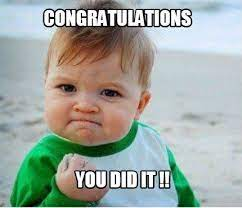
